In [1]:
# import standard depend
import os 
import csv, sqlite3
import pandas as pd

# import sqlalchemy depend 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

# depend for charts 

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create the connection engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [4]:
inspector.get_table_names()

['measurements', 'stations']

In [5]:
# Query All Records in the the Database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
conn = engine.connect()
measurements = pd.read_sql("SELECT * FROM measurements", conn)
measurements.head()

,id,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,0.08,65.0
1,1,USC00519397,2010-01-02,0.00,63.0
2,2,USC00519397,2010-01-03,0.00,74.0
3,3,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-07,0.06,70.0


In [6]:
measurements_df = measurements.set_index("id")
measurements_df.head()

,station,date,prcp,tobs
id,,,,
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
5,USC00519397,2010-01-07,0.06,70.0


In [7]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
measurements=Base.classes.measurements
stations=Base.classes.stations

In [8]:
# Start a session to query the database

session = Session(engine)

In [9]:
# Query Emojis for `date`, and `prcp` and save the query into results

results = session.query(measurements.date, func.sum(measurements.prcp)).group_by(measurements.date).\
    order_by(measurements.id.desc()).limit(365).all()

In [10]:
# Unpack the 'date' and `prcp` from results and save into separate lists
prcp = pd.DataFrame(results, columns=['Date', 'Precipitation'])
prcp = prcp.sort_index(ascending=False)
prcp.head()


,Date,Precipitation
364,2016-07-10,2.43
363,2016-07-11,0.43
362,2016-07-12,0.11
361,2016-07-13,0.32
360,2016-07-14,2.76


In [11]:
# set ticks for dates using for loop 

ticks = np.arange(0, 365, 50)
ticks = ticks.tolist()

date_tick = []
for x in ticks:
    date = prcp["Date"][x]
    date_tick.append(date)    

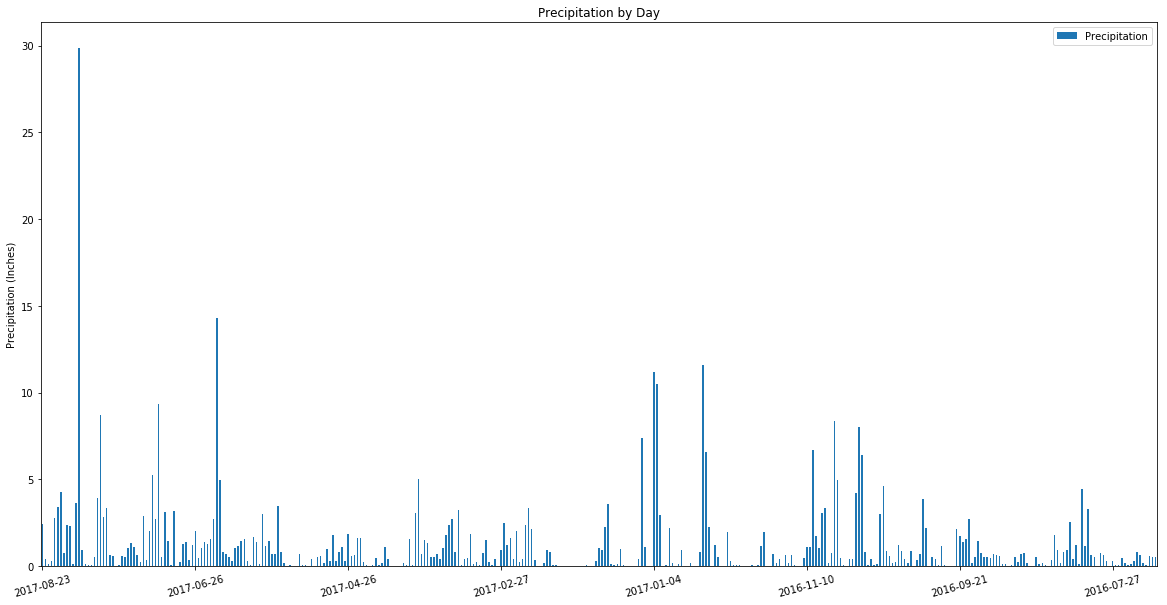

In [12]:
# plot, show, and save graph 

prcp.plot(kind="bar", figsize=(20,10))
plt.xticks(ticks, date_tick, rotation=15)
plt.title("Precipitation by Day")
plt.ylabel("Precipitation (Inches)")
plt.savefig("Precipitation by Day")
plt.show()

In [13]:
# Station Count Query 
station_count = session.query(func.count(stations.id)).all()
station_count

[(9)]

In [14]:
# Query for "Most Active Stations" 

station_activity = session.query(stations.station, 
                                 stations.name, 
                                 measurements.prcp, 
                                 measurements.tobs, 
                                 func.count(measurements.date)). \
    filter (stations.station == measurements.station).\
    group_by(stations.name).order_by(func.count(measurements.date).desc()).all()

station_activity                            

[('USC00519281', 'WAIHEE 837.5, HI US', 0.06, 79.0, 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 0.0, 77.0, 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 81.0, 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.08, 82.0, 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.45, 76.0, 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.0, 82.0, 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.0, 64.0, 1932),
 ('USC00517948', 'PEARL CITY, HI US', 0.01, 80.0, 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 0.0, 74.0, 342)]

In [15]:
highest = "USC00519281"

high_tobs = session.query(measurements.date, measurements.tobs).order_by(measurements.id.desc()). \
    filter(measurements.station == highest).limit(365).all()
# high_tobs

In [16]:
# Convert query into a DF
tobs = pd.DataFrame(high_tobs, columns=["Date", "Temp Observation"])
tobs.head()

,Date,Temp Observation
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0


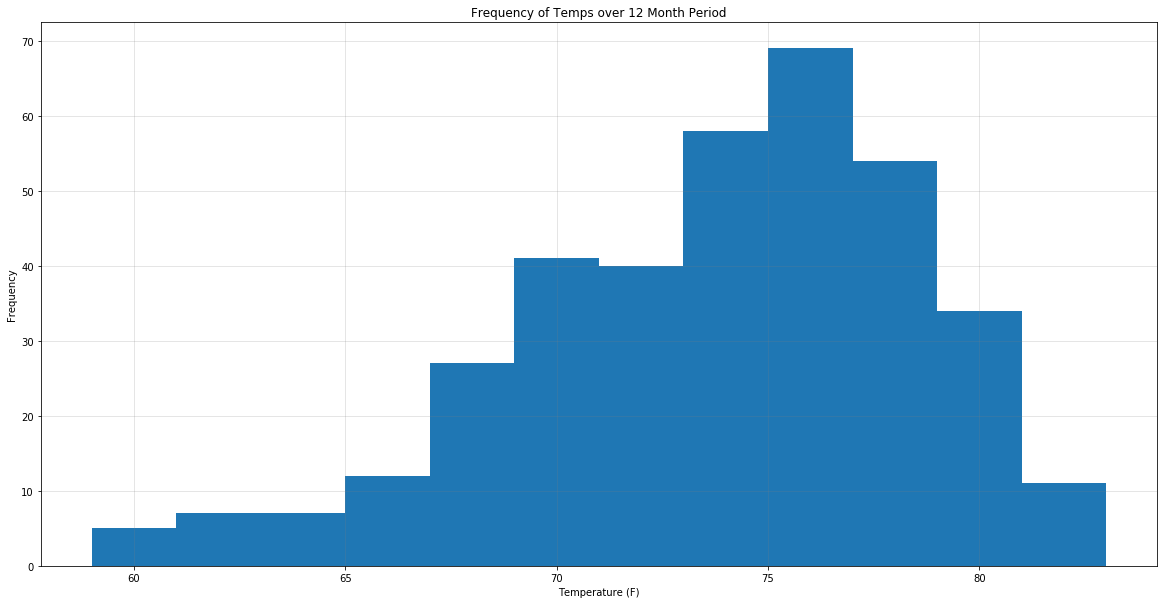

In [17]:
plt.figure(figsize=(20,10))
plt.hist(tobs["Temp Observation"], bins=12)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=.2)
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.title("Frequency of Temps over 12 Month Period")
plt.savefig("12 Month Temp History")
plt.show()

In [2]:
# The Following section of code is located in a separate python file in the repo 
#
# #################################################

# #Start Flask application

# from flask import Flask, jsonify
# app = Flask(__name__)

# #################################################
# # Flask Routes
# #################################################

# @app.route("/")
# def welcome():
#     "Hawaii Data."
#     return (
#         f"Available Links:<br/>"
#         f"/api/v1.0/precipitation<br/>"
#         f"/api/v1.0/stations"
#         f"/api/v1.0/tobs</br>"
#         f"/api/v1.0/'start date as YYYY-MM-DD'</br>"
#         f"/api/v1.0/'start date as YYYY-MM-DD'/'end date as YYYY-MM-DD'</br>"
#     )

# if __name__ == '__main__':
#     app.run(debug=True)



In [1]:
# #Start Flask application
# from flask import Flask, jsonify
# app = Flask(__name__)

# # API landing page 

# @app.route("/")
# def links():
#     return (
#         "Welcome. Below are links to Hawaii Weather Data!</br>"
#         "/api.v1.0/precipitation</br>"
#         "/api/v1.0/stations</br>"
#         "/api/v1.0/tobs</br>"
#         "/api/v1.0/'start date as YYYY-MM-DD'</br>"
#         "/api/v1.0/'start date as YYYY-MM-DD'/'end date as YYYY-MM-DD'</br>"
#     )

# if __name__ == '__main__':
#     app.run(debug=True)


In [3]:

# # prior year's prcp

# @app.route("/api.v1.0/precipitation")
# def precip():
    
#     query = session.query(measurements.date, func.sum(measurements.prcp).label("prcp")). \
#     group_by(measurements.date).order_by(measurements.id.desc()).limit(365).all()

#     prcp = []
#     for rain_drop in query:
#         drop_top = {}
#         drop_top["Date"] = rain_drop.date
#         drop_top["Total Precip"] = rain_drop.prcp
#         prcp.append(drop_top)

#     return jsonify(precipitation)

# if __name__ == '__main__':
#     app.run(debug=True)
    


In [ ]:
# # station info 

# @app.route("/api/v1.0/stations")
# def stations():

#     stat = session.query(stations).all()
    
#     stations_info = []
#     for looping in stat:
#         blank = {}
#         blank["Station"] = looping.station
#         blank["Name"] = looping.name
#         blank["Latitude"] = looping.latitude
#         blank["Longitude"] = looping.longitude
#         blank["Elevation"] = looping.elevation
#         station_info.append(blank)
    
#     return jsonify(station_info)

# if __name__ == '__main__':
#     app.run(debug=True)


In [ ]:
# # tob info

# @app.route("/api/v1.0/tobs")
# def tobs():
    
#     query = session.query(measurements.station, measurements.date, measurements.tobs).filter(measurements.date >= "2016-01-01"). \
#         filter(measurements.date < "2017-01-01").all()
   
#     heat_index = []
#     for hot in query:
#         heat = {}
#         heat["Station ID"] = hot.station
#         heat["Date"] = hot.date
#         heat["Temp Observed"] = hot.tobs
#         Bring.append(heat_index)
    
#     return jsonify(Bring)

# if __name__ == '__main__':
#     app.run(debug=True)

In [ ]:
# # temp from start date 

# @app.route("/api/v1.0/<start>")
# def temps(start='2016-01-01'):
    
#     min_temp = session.query(func.min(measurements.tobs)).filter(measurements.date >= start).all()
#     max_temp = session.query(func.max(measurements.tobs)).filter(measurements.date >= start).all()
#     avg_temp = session.query(func.avg(measurements.tobs)).filter(measurements.date >= start).all()
    
#     min_temp_str = str(min_temp[0][0])
#     max_temp_str = str(max_temp[0][0])
#     avg_temp_str = str(avg_temp[0][0])
    
#     Temps = [{
#             'Min Temp': min_temp_str,
#             'Max Temp': max_temp_str,
#             'Average Temp': avg_temp_str
#     }]
    
#     return jsonify(Temps)

# if __name__ == '__main__':
#     app.run(debug=True)


In [ ]:
# # temps from date range 

# @app.route("/api/v1.0/<start>/<end>")
# def temps(start='', end=''):
    
#     min_temp = session.query(func.min(measurements.tobs)).filter(measurements.date >= start).\
#             filter(Measurement.date <= end).all()
#     max_temp = session.query(func.max(measurements.tobs)).filter(measurements.date >= start).\
#             filter(Measurement.date <= end).all()
#     avg_temp = session.query(func.avg(measurements.tobs)).filter(measurements.date >= start).\
#             filter(measurements.date <= end).all()
    
#     min_temp_str = str(min_temp[0][0])
#     max_temp_str = str(max_temp[0][0])
#     avg_temp_str = str(avg_temp[0][0])
    
#     temps = [{
#             'Min Temp': min_temp_str,
#             'Max Temp': max_temp_str,
#             'Average Temp': avg_temp_str
#     }]
    
#     return jsonify(Temps)

# if __name__ == '__main__':
#     app.run(debug=True)    